In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
from imblearn.over_sampling import SMOTE

In [2]:
from zipfile import ZipFile

zip_file = ZipFile('cc_fraud.zip')
df = pd.read_csv(zip_file.open('fraudTrain.csv'))
df.head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [3]:
df.shape

(1296675, 23)

In [4]:
# df.info()

In [5]:
df = df.set_index(pd.to_datetime(df['trans_date_trans_time'],format= '%Y-%m-%d %H:%M:%S')).sort_index()

In [6]:
df['age_in_days'] = (pd.Timestamp.now() - pd.DatetimeIndex(df['dob']))// pd.Timedelta('1d')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age_in_days
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,13067
2019-01-01 00:00:44,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,16616
2019-01-01 00:00:51,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,22613
2019-01-01 00:01:16,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,20794
2019-01-01 00:03:06,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,13779


In [7]:
df = df.drop(columns=['Unnamed: 0','trans_date_trans_time','cc_num','first','last','street','city','state','trans_num','lat','long','dob','trans_num','unix_time'])
# df.head()

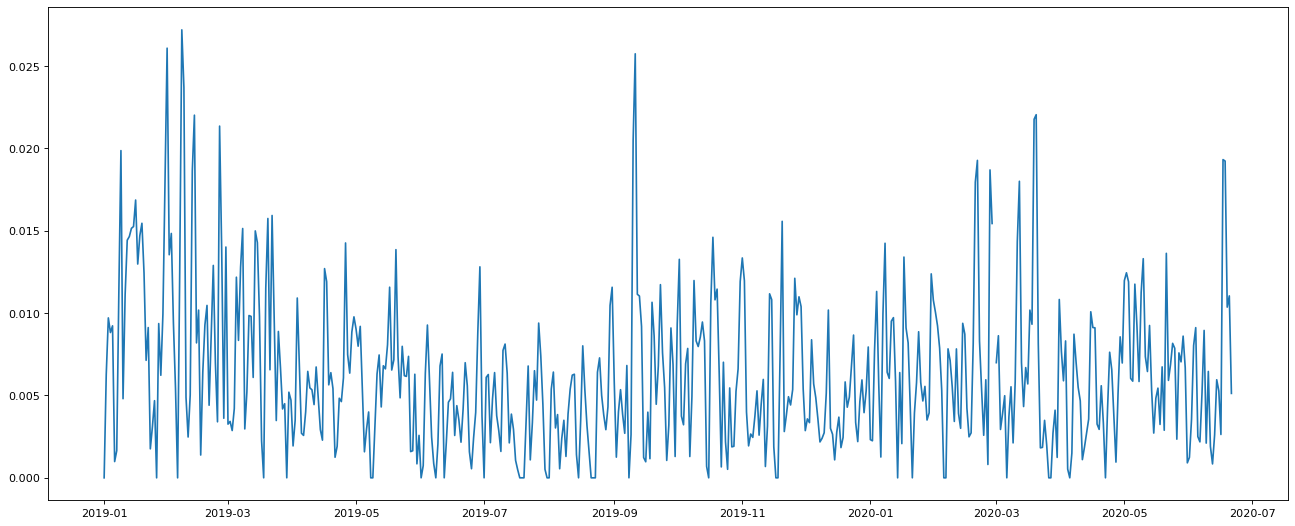

In [8]:
# plt.plot(df.is_fraud)
from matplotlib.pyplot import figure

figure(figsize=(20, 8), dpi=80)
plt.plot(df.is_fraud.resample('D').mean())

# I'd like to see a set of bins: graveyard shift; am; pm

In [19]:
# labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']
# In [1]: pandas.date_range("11:00", "21:30", freq="30min")

(datetime.strftime(pd.to_datetime('21:00:01'), "%H%M%S"))
# datetime_obj = datetime.time(pd.to_datetime('21:00:01'), "%H%M%S") 
  
# It will print the datetime object 
# print(datetime_obj) 
  
    
# extract the time from datetime_obj 
# time = datetime_obj.time() 

AttributeError: module 'datetime' has no attribute 'strftime'

In [ ]:
notebook break

In [ ]:
first_shift = pd.date_range(pd.to_datetime('21:00:01'),pd.to_datetime('05:00:00'),periods= 1)
first_shift

In [ ]:
first_shift = pd.date_range('21:00:01','05:00:00', periods= 1)
second_shift = pd.date_range('05:00:01','13:00:00', periods= 1)
overnight_shift = pd.date_range('13:00:01','21:00:00', periods= 1)
bin_times = [first_shift,second_shift,overnight_shift]
bin_labels = ['first_shift','second_shift','overnight_shift']

In [ ]:
df['time_bin'] = pd.cut(df.index, bins = bin_times, labels=bin_labels, right=False)

In [ ]:
categoricals = ['merchant','category','first','last','gender','street','city','state','job']

In [ ]:
df.head()

In [ ]:
def get_target_and_features(df):
    target = df.columns.to_list()[-1:]
    features = df.columns.to_list()[:-1]
    return target,features

In [ ]:
target,features = get_target_and_features(df)
target

In [ ]:
def train_val(df):
    y = df[target]
    x = df[features]
    x_train, x_validate, y_train, y_validate = train_test_split(x,y,test_size=.30, random_state=42)
    return x_train,x_validate,y_train,y_validate

In [ ]:
x_train,x_validate,y_train,y_validate = train_val(df)

In [ ]:
x_train.sample()

# Need to encode here. (pd.get_dummies)

In [ ]:
features

In [ ]:
for_dummies = ['merchant','category','gender','zip','job','age']

In [ ]:
dummy_train = pd.get_dummies([])
dummy_val
# dummy_test - need to create test df since this was previously split and exists as its own dataset

In [ ]:
xtrain_smote = df[['lat','long','amt','city_pop','merch_lat','merch_long']]
xvalidate_smote = df[['lat','long','amt','city_pop','merch_lat','merch_long']]
xtrain_smote.sample()

In [ ]:
y = df[target]
x = df[features]
x_train, x_validate, y_train, y_validate = train_val(df)

In [ ]:
x_train.head(1)

In [ ]:
sns.histplot(y_train)
plt.title("Class Imbalance: is_Fraud")

In [ ]:
y_train.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state = 42,categorical_features = categoricals)
xtrain_resample, ytrain_resample = sm.fit_resample(x_train, y_train)
xval_resample, yval_resample = sm.fit_resample(x_validate,y_validate)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
xtrain_resample, ytrain_resample = sm.fit_resample(x_train, y_train)
xval_resample, yval_resample = sm.fit_resample(x_validate,y_validate)

In [ ]:
plot_resample(x_train,y_train,xtrain_resample,ytrain_resample,"SMOTE REBALANCING")